# Setup

In [1]:
try:
  import rtree
except ModuleNotFoundError as e:
  !apt-get install libspatialindex-dev
  !pip install rtree
  import rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 11 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (716 kB/s)
Selecting previously unselected package libspatialindex4v5:amd64.
(Reading database ... 144628 files and directories currently installed.)
Preparing to unpack .../libspatialindex4v5_1.8.5-5_

In [2]:
!pip install osmnx

     |████████████████████████████████| 92kB 2.4MB/s 
     |████████████████████████████████| 972kB 7.9MB/s 
     |████████████████████████████████| 71kB 6.9MB/s 
     |████████████████████████████████| 10.9MB 12.3MB/s 
     |████████████████████████████████| 11.6MB 32.3MB/s 
     |████████████████████████████████| 14.9MB 315kB/s 
     |████████████████████████████████| 14.8MB 307kB/s 
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.24.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Found existing installa

## Exercises
- identify the shortest path by walk to reach the Castle of Trento from the main train station
- identify how many bars you can reach by walking in 5 minutes from the main train station of Trento

# identify the shortest path by walk to reach the Castle of Trento from the main train station
- where is the castle in Trento
- where is the main train station

In [1]:
!pip install geopy

## where is the castle in Trento
THe name of the castle of Trento is *Castello del Buonconsiglio*

https://en.wikipedia.org/wiki/Buonconsiglio_Castle



In [2]:
from geopy.geocoders import Nominatim

In [3]:
geolocator = Nominatim(user_agent="geospatial course")
location = geolocator.geocode("Castello del Buonconsiglio")

In [4]:
point_castle =  (location.latitude, location.longitude)

## where is the main train station in Trento

https://en.wikipedia.org/wiki/Trento_railway_station

In [5]:
location = geolocator.geocode("Trento stazione fs")

In [6]:
point_train_station =  (location.latitude, location.longitude)

## create the streets walking graph

In [7]:
import osmnx as ox

In [8]:
G = ox.graph_from_place("Trento, Italy", network_type='walk')

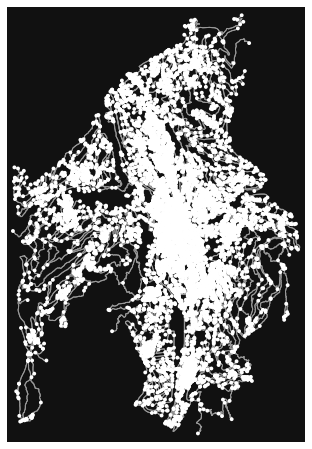

In [9]:
fig, ax = ox.plot_graph(G)

## identify the shortest path

the points must connetected to the graph

In [10]:
point_nearest_train_station= ox.get_nearest_node(G, point_train_station)
point_nearest_castle = ox.get_nearest_node(G, point_castle)

In [12]:
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

### calculate the shortest path ;)

In [13]:
route = ox.shortest_path(G, point_nearest_train_station, point_nearest_castle, weight='travel_time')

### show it on the map 



In [ ]:
ox.plot_route_folium(G,route,popup_attribute='name',tiles='OpenStreetMap')

In [14]:
route

[2591984564,
 885670129,
 923132120,
 864509648,
 1271504829,
 864509624,
 864509653,
 923131626,
 256547302,
 939851099,
 977894450,
 257030408,
 248794958,
 880590599,
 2344153496,
 2653965264,
 2496642274,
 270648222,
 1000099724,
 1638162381,
 889555458,
 266157700,
 889555393,
 983735557,
 998662078,
 998661855,
 983735435,
 983735662,
 983735513,
 955281037,
 1252285107,
 1252285133,
 2889611593,
 6036162196,
 6036162193,
 858341167,
 858341204]

In [15]:
G.nodes[2591984564]

{'osmid': 2591984564, 'x': 11.1195324, 'y': 46.0720446}

In [16]:
G.nodes[2591984564]['x']

11.1195324

In [17]:
from shapely.geometry import Point,LineString

In [18]:
points = []
for idnode in route:
  lon = G.nodes[idnode]['x']
  lat = G.nodes[idnode]['y']
  point = Point(lon,lat)
  points.append(point)

In [19]:
path = LineString(points)

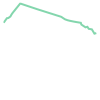

In [20]:
path

In [21]:
import geopandas as gpd

In [23]:
data = {'name': ['from train station to the castle'], 'geometry': [path]}

In [24]:
gdf_path = gpd.GeoDataFrame(data,crs="EPSG:4326") 

In [25]:
gdf_path.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
gdf_path

,name,geometry
0,from train station to the castle,"LINESTRING (11.11953 46.07204, 11.11957 46.072..."


<AxesSubplot:>

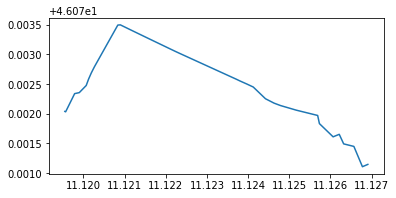

In [27]:
gdf_path.plot()

In [28]:
gdf_path.to_file("path_trainstation2castle_trento.geojson", driver="GeoJSON")

In [ ]:
#from google.colab import files
#files.download("path_trainstation2castle_trento.geojson")

# identify how many bars you can reach by walking in 5 minutes from the main train station of Trento
- download all the *amenity==bar* from OpenStreetMap
- identify the point of the train station
- calculate the distance of each bar from the train station in walking travel time distance 

## download all the amenity=bar from OpenStreetMap

with osmnx

In [29]:
point_train_station

(46.0722416, 11.1193186)

In [30]:
tags = {'amenity': ['bar','cafe']}

In [31]:
trento_bars = ox.geometries_from_place("Trento",tags)

In [32]:
trento_bars.shape

(260, 71)

## check the bar nearest by distance to the train stations

In [33]:
trento_bars.geometry.type.unique()

array(['Point', 'Polygon'], dtype=object)

In [34]:
trento_bars

,unique_id,osmid,element_type,addr:city,addr:housenumber,addr:postcode,addr:street,amenity,name,geometry,addr:country,contact:phone,operator,outdoor_seating,ref:vatin,contact:email,wheelchair,fixme,opening_hours,brewery,contact:website,cost:coffee,smoking,source,created_by,addr:number,shop,phone,internet_access,internet_access:fee,surveillance,contact:facebook,contact:tripadvisor,cuisine,contact:mobile,note,website,toilets:wheelchair,alt_name,contact:company,ref:vat_in,contact:name,contact:fax,email,fax,level,wifi,addr:housename,layer,name:en,name:it,diet:vegan,diet:vegetarian,ref:VATIN,ref:vatin_1,entrance,air_conditioning,payment:cash,payment:debit_cards,description,payment:bancomat,payment:coins,payment:notes,operator:addr:city,operator:addr:housenumber,operator:addr:postcode,operator:addr:street,ref:rea,sells:tobacco,nodes,building
0,node/267578018,267578018,node,Trento,92/1,38123,Via Alcide Degasperi,cafe,Prestige Cafè,POINT (11.12420 46.04979),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node/268401562,268401562,node,Trento,40,38122,Piazza del Duomo,cafe,Caffè Portici,POINT (11.12101 46.06773),IT,+39 0461 092622,Filippo Aldo,yes,IT01452730227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node/268401567,268401567,node,Trento,1,38122,Piazza Mario Pasi,cafe,Bar Pasi,POINT (11.12207 46.06775),IT,+39 0461 982301,Botto W. s.n.c.,yes,IT01311240228,barpasi.tn@gmail.com,limited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node/268430906,268430906,node,NaN,NaN,NaN,NaN,cafe,Johnny Bar,POINT (11.12564 46.06727),NaN,NaN,NaN,yes,NaN,NaN,limited,orario chiusura sabato,Mo-Fr 07:00-21:00; Sa 07:00-12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node/268430908,268430908,node,Trento,29,38122,Via Calepina,cafe,Jo Bar,POINT (11.12426 46.06711),IT,NaN,NaN,yes,NaN,NaN,limited,NaN,Mo-Sa 07:00-20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,way/78363327,78363327,way,NaN,NaN,NaN,NaN,cafe,Max und Moritz,"POLYGON ((11.15457 46.06615, 11.15459 46.06619...",NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[919900147, 919898571, 919897168, 919823719, 9...",yes
256,way/116029569,116029569,way,NaN,NaN,NaN,NaN,bar,Terrazza Tridente,"POLYGON ((11.11916 46.08627, 11.11926 46.08628...",NaN,+39 0461 1823397,Santellina SNC di Lopez & C.,yes,IT01841040221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[1309442301, 1309442345, 1309442292, 130944231...",yes
257,way/137046871,137046871,way,NaN,NaN,NaN,NaN,bar,NaN,"POLYGON ((11.15135 46.04644, 11.15137 46.0

In [35]:
trento_bars.geometry.type.value_counts()

Point      251
Polygon      9
dtype: int64

In [37]:
from shapely.ops import transform
import pyproj

In [39]:
wgs84 = pyproj.CRS('EPSG:4326')
utm32n = pyproj.CRS('EPSG:32632')
projection_transform = pyproj.Transformer.from_crs(wgs84, utm32n, always_xy=False).transform

In [40]:
shapely_point_train_station = Point(point_train_station)

In [41]:
point_train_station_utm32n = transform(projection_transform,shapely_point_train_station)

In [42]:
point_train_station_utm32n.wkt

'POINT (663888.6956006237 5104257.577081034)'

In [43]:
trento_bars.geometry.to_crs(epsg=32632).representative_point().distance(point_train_station_utm32n)

0      2524.142113
1       518.512766
2       542.515407
3       737.889408
4       686.542193
          ...     
255    2813.859928
256    1554.211774
257    3799.815530
258    1653.311307
259    3378.216513
Length: 260, dtype: float64

In [44]:
trento_bars['haversine_distance_to_train_station'] = trento_bars.geometry.to_crs(epsg=32632).representative_point().distance(point_train_station_utm32n)

In [45]:
trento_bars.sort_values(by=['haversine_distance_to_train_station'])

,unique_id,osmid,element_type,addr:city,addr:housenumber,addr:postcode,addr:street,amenity,name,geometry,addr:country,contact:phone,operator,outdoor_seating,ref:vatin,contact:email,wheelchair,fixme,opening_hours,brewery,contact:website,cost:coffee,smoking,source,created_by,addr:number,shop,phone,internet_access,internet_access:fee,surveillance,contact:facebook,contact:tripadvisor,cuisine,contact:mobile,note,website,toilets:wheelchair,alt_name,contact:company,ref:vat_in,contact:name,contact:fax,email,fax,level,wifi,addr:housename,layer,name:en,name:it,diet:vegan,diet:vegetarian,ref:VATIN,ref:vatin_1,entrance,air_conditioning,payment:cash,payment:debit_cards,description,payment:bancomat,payment:coins,payment:notes,operator:addr:city,operator:addr:housenumber,operator:addr:postcode,operator:addr:street,ref:rea,sells:tobacco,nodes,building,haversine_distance_to_train_station
96,node/867377187,867377187,node,Trento,1,38122,Piazza Dante,bar,Bar Stazione Buffet Trento,POINT (11.11946 46.07250),IT,NaN,Serenissima Ristorazione SPA,NaN,IT01617950249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.018800
253,way/73089915,73089915,way,Trento,13,NaN,Piazza Dante,bar,Flora,"POLYGON ((11.12028 46.07245, 11.12027 46.07241...",NaN,NaN,Sali e Tabacchi Riv. N° 23,NaN,NaN,NaN,NaN,NaN,Mo-Sa 06:00-21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tobacco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[867377189, 867377061, 867377184, 867377320, 8...",yes,79.059449
254,way/73293759,73293759,way,NaN,NaN,NaN,NaN,cafe,Bar Caffetteria Dogana,"POLYGON ((11.12085 46.07342, 11.12075 46.07338...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[869314003, 869314081, 869313986, 869314147, 8...",yes,173.832806
97,node/867377209,867377209,node,Trento,2,38122,Via Dogana,bar,Bar Trento-Malé,POINT (11.12038 46.07375),IT,+39 0461 239398,Caset Mariarita,NaN,IT01556070223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.932583
231,node/4264239318,4264239318,node,Trento,30,38122,Piazza Dante,bar,Liber Café,POINT (11.12091 46.07086),IT,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palazzina Liberty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196.739151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,node/6240265349,6240265349,node,NaN,NaN,NaN,NaN,bar,Bar Phoenix,POINT (11.13015 46.00744),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7251.284878
21,node/430543937,430543937,node,Trento,NaN,38123,Piazza Perini Quintilio,cafe,"Bar Pasticceria ""Dolce Cuore""",POINT (11.12858 46.00676),IT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,pastry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7313.387830
170,node/16850

In [46]:
trento_bars[trento_bars.haversine_distance_to_train_station == trento_bars.haversine_distance_to_train_station.min()].name.values[0]

'Bar Stazione Buffet Trento'

## find the distance of each bar to the train station


In [47]:
point_nearest_train_station= ox.get_nearest_node(G, point_train_station)

### add the weights of speed and travel time


check documentation [module-osmnx.speed](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.speed)

If edge *maxspeed* attribute has *“mph”* in it, value will automatically be converted from miles per hour to km per hour. 

Any other speed units should be manually converted to km per hour prior to running this function, otherwise there could be unexpected results. 

If “mph” does not appear in the edge’s maxspeed attribute string, then function assumes kph, per OSM guidelines: 

https://wiki.openstreetmap.org/wiki/Map_Features/Units

**hwy_speeds** *(dict)* 

*dict keys* = *OSM highway types and values* = typical  speeds (km per hour) to assign to edges of that highway type for any edges missing speed data. 

Any edges with highway type not in hwy_speeds will be assigned the mean preexisting speed value of all edges of that highway type.



In [49]:
# we can assume 2km/h for each kind of street
hwy_walking_speeds = {
    'motorway ': 2,
    'trunk': 2,
    'primary': 2,
    'secondary': 2,
    'tertiary': 2,
    'unclassified': 2,
    'residential': 2,
    'pedestrian': 2,
    'living_street':2,
    'steps':2,
    'footway': 2,
    'track':2}
G = ox.add_edge_speeds(G,hwy_speeds=hwy_walking_speeds)


In [50]:
G = ox.add_edge_travel_times(G)

In [52]:
trento_bars.nearest_point_to_graph.apply(lambda to_point: ox.shortest_path(G, point_nearest_train_station, to_point))

0      [2591984564, 885670129, 923131713, 864509575, ...
1      [2591984564, 885670129, 923131713, 864509575, ...
2      [2591984564, 885670129, 923131713, 864509575, ...
3      [2591984564, 885670129, 923131713, 864509575, ...
4      [2591984564, 885670129, 923131713, 864509575, ...
                             ...                        
255    [2591984564, 885670129, 923131713, 864509575, ...
256    [2591984564, 885670129, 923132120, 864509648, ...
257    [2591984564, 885670129, 923131713, 864509575, ...
258    [2591984564, 885670129, 923131713, 864509575, ...
259    [2591984564, 885670129, 923131713, 864509575, ...
Name: nearest_point_to_graph, Length: 260, dtype: object

In [53]:
trento_bars['nearest_point_to_graph'] = trento_bars.geometry.representative_point().apply(lambda point: ox.get_nearest_node(G, (point.y,point.x)))

calculate the short path from the train station to each bar

In [54]:
trento_bars['route_from_train_station'] = trento_bars.nearest_point_to_graph.apply(lambda to_point: ox.shortest_path(G, point_nearest_train_station, to_point))

create geometry of each path 

In [55]:
def geometry_from_route(inG,route):
  points = []
  for idnode in route:
    lon = inG.nodes[idnode]['x']
    lat = inG.nodes[idnode]['y']
    point = Point(lon,lat)
    points.append(point)
  return(LineString(points))

In [56]:
trento_bars['linestring'] = trento_bars.route_from_train_station.apply(lambda route: geometry_from_route(G,route))

<AxesSubplot:>

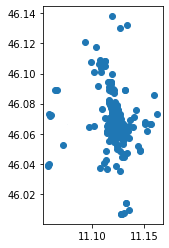

In [57]:
trento_bars.plot()

<AxesSubplot:>

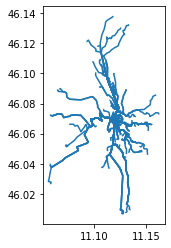

In [58]:
trento_bars.set_geometry('linestring').plot()

calculate time for each path

In [59]:
def travel_time_from_train_station(inG, route):
  edge_times = ox.utils_graph.get_route_edge_attributes(inG, route, 'travel_time')
  return (sum(edge_times))

In [60]:
def leght_path_from_train_station(inG, route):
  edge_lengths = ox.utils_graph.get_route_edge_attributes(inG, route, 'length')
  return (sum(edge_lengths))

In [61]:
trento_bars['travel_time_from_train_station'] = trento_bars.route_from_train_station.apply(lambda route: travel_time_from_train_station(G,route))

In [62]:
trento_bars['path_length_from_train_station'] = trento_bars.route_from_train_station.apply(lambda route: travel_time_from_train_station(G,route))

show the first 5 bars by harvesine distance

In [63]:
trento_bars.sort_values(by=['haversine_distance_to_train_station']).head(5)[['name','haversine_distance_to_train_station']]

,name,haversine_distance_to_train_station
96,Bar Stazione Buffet Trento,31.018800
253,Flora,79.059449
254,Bar Caffetteria Dogana,173.832806
97,Bar Trento-Malé,186.932583
231,Liber Café,196.739151


show the first 5 bars by travel time distance (in seconds)

In [64]:
trento_bars.sort_values(by=['travel_time_from_train_station']).head(5)[['name','travel_time_from_train_station']]

,name,travel_time_from_train_station
96,Bar Stazione Buffet Trento,9.4
253,Flora,36.1
168,Giornale & Caffè,181.4
80,Bar Buonconsiglio,271.3
48,Eurocafè,271.5


## all the bar reachable in 5 minutes from the train station of Trento

In [65]:
import datetime

In [66]:
five_minutes_in_seconds = 5*60

In [68]:
five_minutes_in_seconds

300

In [70]:
bars_five_minutes_from_train_station = trento_bars[trento_bars.travel_time_from_train_station <= five_minutes_in_seconds]

In [71]:
bars_five_minutes_from_train_station = bars_five_minutes_from_train_station.sort_values(by=['travel_time_from_train_station'])

In [72]:
bars_five_minutes_from_train_station

,unique_id,osmid,element_type,addr:city,addr:housenumber,addr:postcode,addr:street,amenity,name,geometry,addr:country,contact:phone,operator,outdoor_seating,ref:vatin,contact:email,wheelchair,fixme,opening_hours,brewery,contact:website,cost:coffee,smoking,source,created_by,addr:number,shop,phone,internet_access,internet_access:fee,surveillance,contact:facebook,contact:tripadvisor,cuisine,contact:mobile,note,website,toilets:wheelchair,alt_name,contact:company,ref:vat_in,contact:name,contact:fax,email,fax,level,wifi,addr:housename,layer,name:en,name:it,diet:vegan,diet:vegetarian,ref:VATIN,ref:vatin_1,entrance,air_conditioning,payment:cash,payment:debit_cards,description,payment:bancomat,payment:coins,payment:notes,operator:addr:city,operator:addr:housenumber,operator:addr:postcode,operator:addr:street,ref:rea,sells:tobacco,nodes,building,haversine_distance_to_train_station,nearest_point_to_graph,route_from_train_station,linestring,travel_time_from_train_station,path_length_from_train_station
96,node/867377187,867377187,node,Trento,1,38122,Piazza Dante,bar,Bar Stazione Buffet Trento,POINT (11.11946 46.07250),IT,NaN,Serenissima Ristorazione SPA,NaN,IT01617950249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.018800,864509648,"[2591984564, 885670129, 923132120, 864509648]","LINESTRING (11.1195324 46.0720446, 11.119568 4...",9.4,9.4
253,way/73089915,73089915,way,Trento,13,NaN,Piazza Dante,bar,Flora,"POLYGON ((11.12028 46.07245, 11.12027 46.07241...",NaN,NaN,Sali e Tabacchi Riv. N° 23,NaN,NaN,NaN,NaN,NaN,Mo-Sa 06:00-21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tobacco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[867377189, 867377061, 867377184, 867377320, 8...",yes,79.059449,963740221,"[2591984564, 885670129, 1271504902, 877620756,...","LINESTRING (11.1195324 46.0720446, 11.119568 4...",36.1,36.1
168,node/1662768545,1662768545,node,Trento,29/1,38122,Via Clementino Vannetti,bar,Giornale & Caffè,POINT (11.12208 46.07266),IT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218.432987,975288587,"[2591984564, 885670129, 1271504902, 877620756,...","LINESTRING (11.1195324 46.0720446, 11.119568 4...",181.4,181.4
80,node/660602730,660602730,node,Trento,10/A,38122,Via Gian Domenico Romagnosi,bar,Bar Buonconsiglio,POINT (11.12227 46.07293),IT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241.091528,1492679756,"[2591984564, 885670129, 1271504902, 877620756,...","LINESTRING (11.1195324 46.0720446, 11.119568 4...",271.3,271.3
48,node/475083135,475083135,node,Trento,27,38122,Via Giovanni Segantini,bar,Eurocafè,POINT (11.12211 46.07476),IT,NaN,M. Agostino & C.,NaN,IT02095270225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,353.602740,2316205227,"[2591984564, 885670129, 923132120, 864509648, ...","LINESTRING (11.1195324 46.0720446, 11.119568 4...",271.5,271.5
143,node/1293893598,1293893598,node,Trento,20,38122,Via Torre Verde,bar,BarConad,POINT (11.12306 46.07070),IT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sandwich;breakfast;coffee_shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BarConaf,BarConad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [76]:
maps = []
texts = []
for index, row in bars_five_minutes_from_train_station.iterrows():
    name = row['name']
    travel_time_from_train_station = row['travel_time_from_train_station']
    minutes = str(datetime.timedelta(seconds=travel_time_from_train_station))
    distance = row['path_length_from_train_station']
    route = row['route_from_train_station']
    text = "the bar %s is %s meters from the train station and it's reachable in %s minutes" % (name, str(round(distance)), minutes[3:7])
    texts.append(text)
    maps.append(ox.plot_route_folium(G,route,popup_attribute='name',tiles='OpenStreetMap'))

In [77]:
len(maps)

7

In [78]:
texts[0]

"the bar Bar Stazione Buffet Trento is 9 meters from the train station and it's reachable in 0:09 minutes"

In [79]:
maps[0]

In [80]:
texts[1]

"the bar Flora is 36 meters from the train station and it's reachable in 0:36 minutes"

In [81]:
maps[1]

In [82]:
texts[2]

"the bar Giornale & Caffè is 181 meters from the train station and it's reachable in 3:01 minutes"

In [83]:
maps[2]

In [84]:
texts[3]

"the bar Bar Buonconsiglio is 271 meters from the train station and it's reachable in 4:31 minutes"

In [85]:
maps[3]

In [86]:
texts[4]

"the bar Eurocafè is 272 meters from the train station and it's reachable in 4:31 minutes"

In [87]:
maps[4]

In [88]:
texts[5]

"the bar BarConad is 285 meters from the train station and it's reachable in 4:44 minutes"

In [89]:
maps[5]

In [90]:
texts[6]

"the bar Bar Caffetteria Dogana is 285 meters from the train station and it's reachable in 4:44 minutes"

In [91]:
maps[6]

In [ ]:
points = bars_five_minutes_from_train_station[['name','geometry','addr:street','addr:housenumber','addr:city', 'travel_time_from_train_station','path_length_from_train_station']].set_geometry("geometry")

In [ ]:
points

,name,geometry,addr:street,addr:housenumber,addr:city,travel_time_from_train_station,path_length_from_train_station
96,Bar Stazione Buffet Trento,POINT (11.11946 46.07250),Piazza Dante,1,Trento,4.2,4.2
253,Flora,"POLYGON ((11.12028 46.07245, 11.12027 46.07241...",Piazza Dante,13,Trento,9.9,9.9
23,Gigi's Caffè,POINT (11.11970 46.06987),Via Andrea Pozzo,24,Trento,21.5,21.5
254,Bar Caffetteria Dogana,"POLYGON ((11.12085 46.07342, 11.12075 46.07338...",NaN,NaN,NaN,21.9,21.9
168,Giornale & Caffè,POINT (11.12208 46.07266),Via Clementino Vannetti,29/1,Trento,25.5,25.5
...,...,...,...,...,...,...,...
43,Bar Agip,POINT (11.11285 46.04254),NaN,NaN,NaN,294.4,294.4
187,Bar Sorriso,POINT (11.10845 46.10373),NaN,NaN,NaN,295.3,295.3
190,NaN,POINT (11.10822 46.10601),NaN,NaN,NaN,295.4,295.4
196,Bar Povo 1,POINT (11.15021 46.06659),NaN,NaN,NaN,297.2,297.2


In [ ]:
points['geometry'] = points.geometry.representative_point()

In [ ]:
points

,name,geometry,addr:street,addr:housenumber,addr:city,travel_time_from_train_station,path_length_from_train_station
96,Bar Stazione Buffet Trento,POINT (11.11946 46.07250),Piazza Dante,1,Trento,4.2,4.2
253,Flora,POINT (11.12030 46.07243),Piazza Dante,13,Trento,9.9,9.9
23,Gigi's Caffè,POINT (11.11970 46.06987),Via Andrea Pozzo,24,Trento,21.5,21.5
254,Bar Caffetteria Dogana,POINT (11.12094 46.07333),NaN,NaN,NaN,21.9,21.9
168,Giornale & Caffè,POINT (11.12208 46.07266),Via Clementino Vannetti,29/1,Trento,25.5,25.5
...,...,...,...,...,...,...,...
43,Bar Agip,POINT (11.11285 46.04254),NaN,NaN,NaN,294.4,294.4
187,Bar Sorriso,POINT (11.10845 46.10373),NaN,NaN,NaN,295.3,295.3
190,NaN,POINT (11.10822 46.10601),NaN,NaN,NaN,295.4,295.4
196,Bar Povo 1,POINT (11.15021 46.06659),NaN,NaN,NaN,297.2,297.2


In [ ]:
import folium

In [ ]:
y = points.geometry.unary_union.centroid.y
x = points.geometry.unary_union.centroid.x
geojson = points.to_json()

In [ ]:
map = folium.Map([y,x], zoom_start=16)
folium.GeoJson(geojson).add_to(map)
map
